# AIAA 2020 Figures related to absorption emission spectroscopy (Figure 4) 

In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import Timestamp
import pickle

from mhdpy import *
import mhdpy

import pytz
mpl.rcParams.update({'font.size': 16, 'timezone': pytz.timezone('America/Los_Angeles')})

In [2]:
finalanalysisfolder = os.getcwd() #Folder with notebooks

ds_alpha = xr.load_dataset(os.path.join(finalanalysisfolder, 'Data', 'spectral_data', 'ds_alpha.cdf'))
ds_alpha_residualseed = xr.load_dataset(os.path.join(finalanalysisfolder, 'Data','spectral_data', 'ds_alpha_residualseed.cdf'))
ds_p = xr.load_dataset(os.path.join(finalanalysisfolder, 'Data','spectral_data', 'fit_params.cdf'))
ds_p_stderr = xr.load_dataset(os.path.join(finalanalysisfolder, 'Data','spectral_data', 'fit_params_stderr.cdf'))

# ds_alpha = ds_alpha.sel(wavelength = slice(765,771))

# Residual Seed

Text(0.5, 1.0, '')

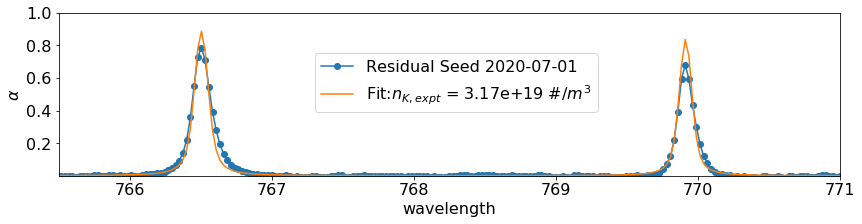

In [3]:

nK_residualseed = ds_alpha_residualseed['alpha_fit'].attrs['fit_nK']
nK_residualseed_stderr = ds_alpha_residualseed['alpha_fit'].attrs['fit_nK_stderr']

nK_residualseed = round(nK_residualseed,3)

fitstr = '$n_{K,expt}$ = ' + '{:0.2e}'.format(nK_residualseed) + ' $\#/m^3$'

ds_alpha_residualseed['alpha'].plot(marker='o', label = 'Residual Seed 2020-07-01', figsize = (14,3))
ds_alpha_residualseed['alpha_fit'].plot(label = 'Fit:' + fitstr)
# plt.plot(wls_fit, out.eval(x=wls_fit), label = 'Fit:' + fitstr)
plt.ylim(1e-4,1)
plt.xlim(765.5,771)
# plt.xlim(766,767)
# plt.yscale('log')
plt.ylabel('$\\alpha$')
plt.legend(bbox_to_anchor=[0,0,0.7,0.8])
plt.title('')

# Seeded Cases 

In [4]:
fits = ds_alpha['alpha_fit']
alpha_tc_red = ds_alpha['alpha_red']

In [5]:
# fits, ds_p, ds_p_stderr = analysis.xr.fit_da_lmfit(A_abs, final_model, pars, 'wavelength', wls_interp)
ds_together = xr.merge([fits,alpha_tc_red]).rename(alpha_fit='Fit').rename(alpha_red='Experiment').to_array('var')
ds_together.attrs = dict(long_name = '$\\alpha$')

ds_together

<xarray.DataArray (var: 2, date: 4, Kwt: 3, tf: 3, wavelength: 538)>
array([[[[[       nan,        nan,        nan, ...,        nan,
                  nan,        nan],
          [0.00224505, 0.00225768, 0.00227628, ..., 0.00226723,
           0.00224824, 0.00223536],
          [0.00219143, 0.00220376, 0.00222191, ..., 0.00221308,
           0.00219455, 0.00218198]],

         [[       nan,        nan,        nan, ...,        nan,
                  nan,        nan],
          [0.00691365, 0.00695244, 0.00700959, ..., 0.00698178,
           0.00692347, 0.00688389],
          [       nan,        nan,        nan, ...,        nan,
                  nan,        nan]],

         [[       nan,        nan,        nan, ...,        nan,
                  nan,        nan],
          [0.01841239, 0.01851509, 0.01866637, ..., 0.01859276,
           0.01843836, 0.01833359],
          [       nan,        nan,        nan, ...,        nan,
                  nan,        nan]]],


        [[[0.0014477 , 0.00145584, 0.00146784, ..., 0.00146201,
           0.00144976, 0.00144145],
          [0.00142043, 0.00142842, 0.00144019, ..., 0.00143446,
           0.00142245, 0.0014143 ],
          [0.00187601, 0.00188657, 0.00190211, ..., 0.00189455,
           0.00187868, 0.00186792]],

         [[       nan,        nan,        nan, ...,        nan,
                  nan,        nan],
          [       nan,        nan,        nan, ...,        nan,
                  nan,        nan],
          [       nan,        nan,        nan, ...,        nan,
                  nan,        nan]],

         [[       nan,        nan,        nan, ...,        nan,
                  nan,        nan],
          [       nan,        nan,        nan, ...,        nan,
                  nan,        nan],
          [       nan,        nan,        nan, ...,        nan,
                  nan,        nan]]],


        [[[0.00156717, 0.00157599, 0.00158898, ..., 0.00158266,
           0.0015694 , 0.00156041],
          [0.00215761, 0.00216975, 0.00218762, ..., 0.00217892,
           0.00216068, 0.0021483 ],
          [0.00231873, 0.00233177, 0.00235098, ..., 0.00234163,
           0.00232203, 0.00230872]],

         [[       nan,        nan,        nan, ...,        nan,
                  nan,        nan],
          [0.00708852, 0.00712828, 0.00718687, ..., 0.00715836,
           0.00709858, 0.00705801],
          [       nan,        nan,        nan, ...,        nan,
                  nan,        nan]],

         [[       nan,        nan,        nan, ...,        nan,
                  nan,        nan],
          [0.01909166, 0.01919811, 0.01935492, ..., 0.01927862,
           0.01911859, 0.01900998],
          [       nan,        nan,        nan, ...,        nan,
                  nan,        nan]]],


        [[[0.00125873, 0.00126582, 0.00127625, ..., 0.00127117,
           0.00126053, 0.0012533 ],
          [0.00184967, 0.00186008, 0.0018754 , ..., 0.00186795,
           0.0018523 , 0.00184169],
          [0.00178344, 0.00179347, 0.00180826, ..., 0.00180106,
           0.00178598, 0.00177575]],

         [[       nan,        nan,        nan, ...,        nan,
                  nan,        nan],
          [0.00509285, 0.00512145, 0.00516358, ..., 0.00514308,
           0.00510008, 0.0050709 ],
          [       nan,        nan,        nan, ...,        nan,
                  nan,        nan]],

         [[       nan,        nan,        nan, ...,        nan,
                  nan,        nan],
          [0.01823139, 0.01833309, 0.0184829 , ..., 0.01841001,
           0.01825711, 0.01815336],
          [       nan,        nan,        nan, ...,        nan,
                  nan,        nan]]]],



       [[[[       nan,        nan,        nan, ...,        nan,
                  nan,        nan],
          [0.01934521, 0.01793879, 0.01768153, ..., 0.04976102,
           0.04856179, 0.0486572 ],
          [0.01700754, 0.01578198, 0.01497803, ..., 0.04479272,
           0.04373699, 0.04248202

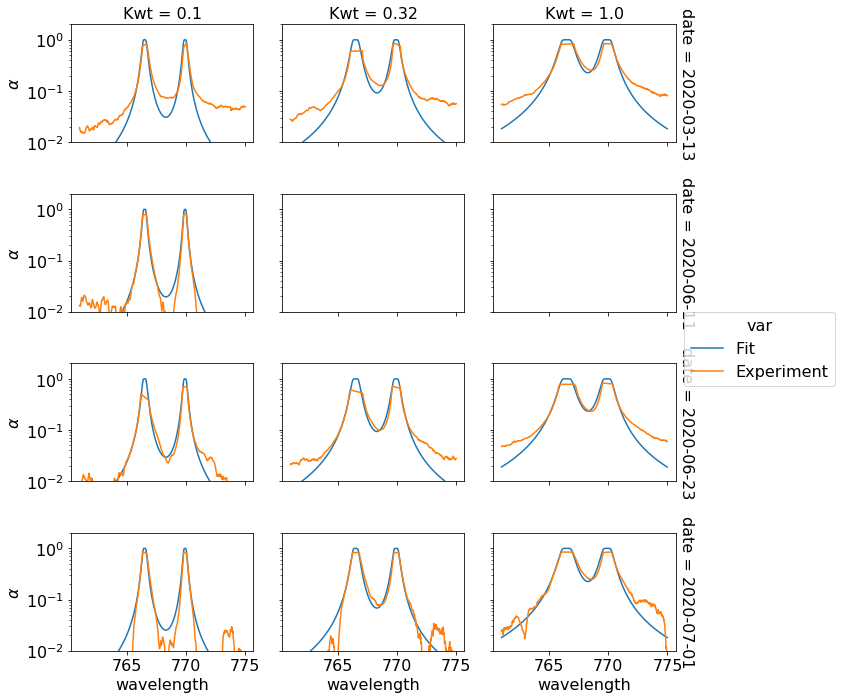

In [6]:
g = ds_together.sel(tf=12.94, method = 'nearest').plot(hue='var', col='Kwt', row='date', ylim = (1e-2,2), yscale='log', figsize=(10,10))

plot.dropna(g)

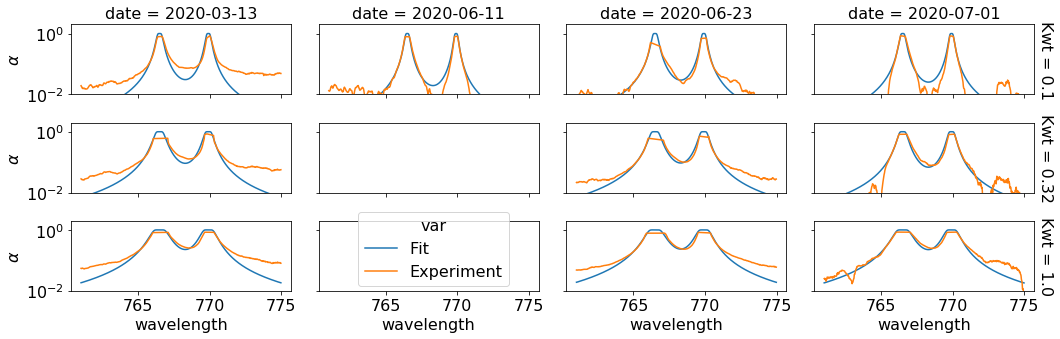

In [7]:
g = ds_together.sel(tf=12.94, method = 'nearest').plot(hue='var', col='date', row='Kwt', ylim = (1e-2,2), yscale='log', figsize=(15,5))

plot.dropna(g)

g.figlegend.set_bbox_to_anchor([0,0,0.42,0.5])

# g.figlegend.remove()

Text(0.5, 0.98, '2020-06-23')

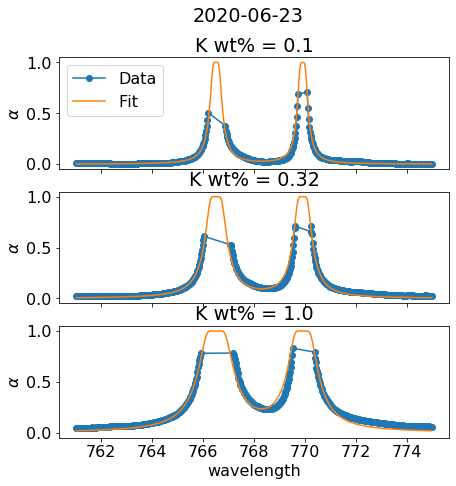

In [8]:

ds = xr.merge([fits,alpha_tc_red]).rename(alpha_fit='Fit').rename(alpha_red='Experiment')
ds = ds.sel(date='2020-06-23').sel(tf=12.94, method='nearest')

g = xr.plot.FacetGrid(ds,row='Kwt', figsize=(7,7))

axes_list=g.axes.flatten()

for i, ax in enumerate(axes_list):
    d = g.name_dicts.flatten()[i]
    ds['Experiment'].sel(d).plot(ax=ax, marker = 'o', label='Data')
    ds['Fit'].sel(d).plot(ax=ax, label='Fit')
    
    if i!=len(axes_list)-1:
        ax.set_xlabel('')
    
# #     if i != len(axes_list)-1:
#     ax.get_legend().remove()
# #     else:
# #         ax.get_legend().set_bbox_to_anchor([0,0,2,1])
    if i == 0:
        ax.legend(bbox_to_anchor=[0,0,0.5,1])
        
    
    ax.set_title('K wt%' + ' = ' + str(d['Kwt']))
    
plot.dropna(g)

plt.suptitle('2020-06-23')

# nK Results

In [9]:
ds_p.coords['tf'].attrs = dict(long_name = 'Total Mass Flow', units = 'g/s') #Shorten

nK = ds_p['nK_m3']
nK.name ='nK'
nK_err = ds_p_stderr['nK_m3']

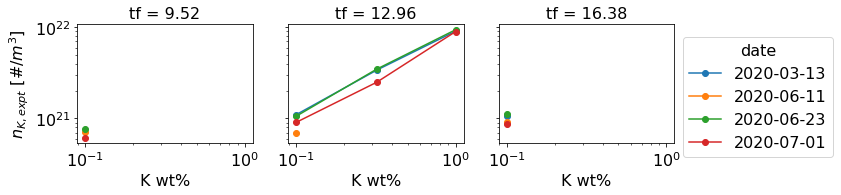

In [10]:
g = nK.plot(hue='date', col='tf', marker='o', xscale='log', yscale='log')
plot.dropna(g)
# fitstr = 'sigma = ' + str(pars['p1_sigma'].value) + ' nm, gamma = ' + str(pars['p1_gamma'].value) + ' nm'
# plt.suptitle(fitstr, y=1.05)

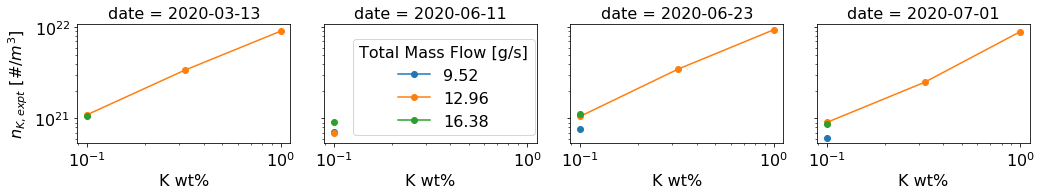

In [11]:
g = nK.plot(hue='tf', col='date', marker='o', yscale='log', xscale='log', figsize = (15,3))
plot.dropna(g)

g.figlegend.set_bbox_to_anchor([0,0,0.43,1])

# fitstr = 'sigma = ' + str(pars['p1_sigma'].value) + ' nm, gamma = ' + str(pars['p1_gamma'].value) + ' nm'
# plt.suptitle(fitstr, y=1.05)

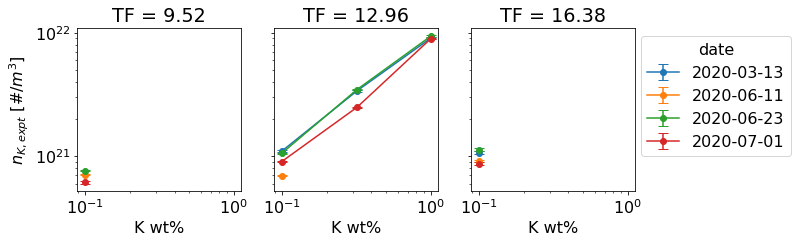

In [12]:
coldim = 'tf'
huedim = 'date'

m = nK
s = nK_err

g = xr.plot.FacetGrid(m,col=coldim)

axes_list=g.axes.flatten()

for i, ax in enumerate(axes_list):
    d = g.name_dicts.flatten()[i]
    plot.common.xr_errorbar_axes(m.sel(d).drop(coldim), s.sel(d).drop(coldim), ax, huedim=huedim, capsize=5)
    
    ax.set_yscale('log')
    ax.set_xscale('log')    
    
    if i!=0:
        ax.set_ylabel('')
    
    if i != len(axes_list)-1:
        ax.get_legend().remove()
    else:
        ax.get_legend().set_bbox_to_anchor([0,0,2,1])
        
    ax.set_title('TF' + ' = ' + str(d[coldim]))
    
plot.dropna(g)

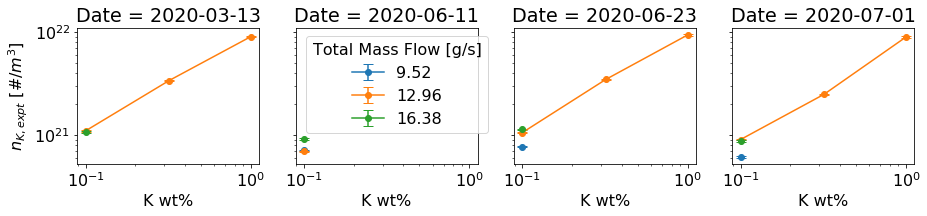

In [13]:
coldim = 'date'
huedim = 'tf'

m = nK
s = nK_err

g = xr.plot.FacetGrid(m,col=coldim,figsize = (15,2.5))

axes_list=g.axes.flatten()

for i, ax in enumerate(axes_list):
    d = g.name_dicts.flatten()[i]
    plot.common.xr_errorbar_axes(m.sel(d).drop(coldim), s.sel(d).drop(coldim), ax, huedim=huedim, capsize=5)
    
    ax.set_yscale('log')
    ax.set_xscale('log')    
    
    if i!=0:
        ax.set_ylabel('')
    
    if i != 1:
        ax.get_legend().remove()
    else:
        ax.get_legend().set_bbox_to_anchor([0,0,1.1,1])
    
        
    ax.set_title('Date' + ' = ' + str(d[coldim]))
    
plot.dropna(g)

C:\Users\aspit\anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


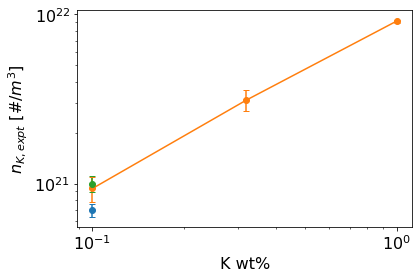

In [14]:
nK_mean = nK.mean('date', keep_attrs=True)
nK_std = nK.std('date', keep_attrs=True)


fig, axes = plot.common.xr_errorbar(nK_mean, nK_std, huedim='tf')

# fig.set_size_inches(5,6.5)
plt.yscale('log')
plt.xscale('log')

plt.gca().get_legend().remove()

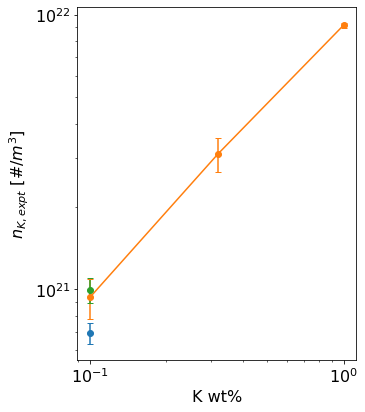

In [15]:
nK_mean = nK.mean('date', keep_attrs=True)
nK_std = nK.std('date', keep_attrs=True)


fig, axes = plot.common.xr_errorbar(nK_mean, nK_std, huedim='tf')

fig.set_size_inches(5,6.5)
plt.yscale('log')
plt.xscale('log')

plt.gca().get_legend().remove()